In [2]:
import zipfile
import pandas as pd

zip_path = "Warehouse_and_Retail_Sales.csv.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    csv_name = z.namelist()[0]
    df = pd.read_csv(z.open(csv_name))

df.head()


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [3]:
df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [4]:
df["SUPPLIER"] = df["SUPPLIER"].fillna("Unknown")
df["ITEM TYPE"] = df["ITEM TYPE"].fillna("Unknown")
df["RETAIL SALES"] = df["RETAIL SALES"].fillna(0)

In [5]:
df.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
dtype: int64

In [6]:
df["RETAIL SALES"] = df["RETAIL SALES"].abs()
df["WAREHOUSE SALES"] = df["WAREHOUSE SALES"].abs()

In [7]:
# making a proper date column using year and month
df["DATE"] = pd.to_datetime(df["YEAR"].astype(str) + "-" + df["MONTH"].astype(str) + "-01")

In [8]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,DATE
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2020-01-01
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,2020-01-01
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,2020-01-01
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,2020-01-01
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,2020-01-01


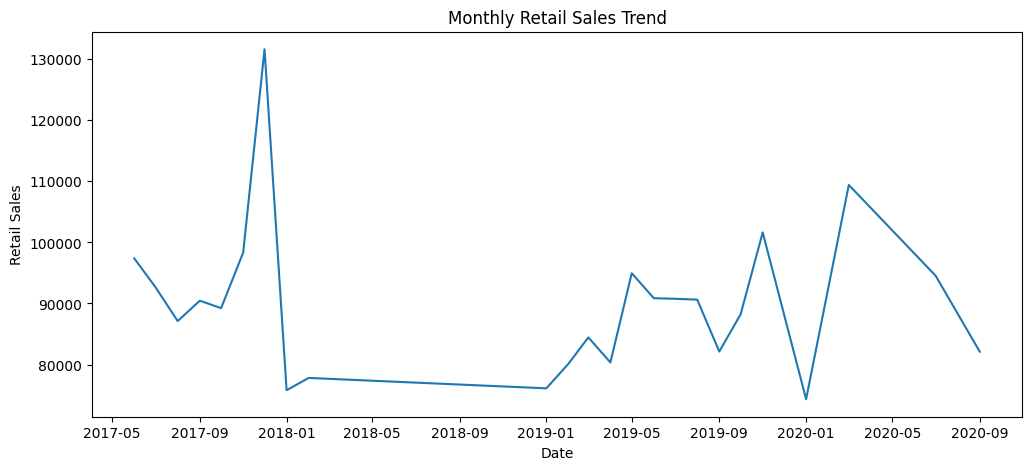

In [9]:
# checking total retail sales month by month
monthly_sales = df.groupby("DATE")["RETAIL SALES"].sum()

# plotting the monthly sales trend
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_sales)
plt.xlabel("Date")
plt.ylabel("Retail Sales")
plt.title("Monthly Retail Sales Trend")
plt.show()

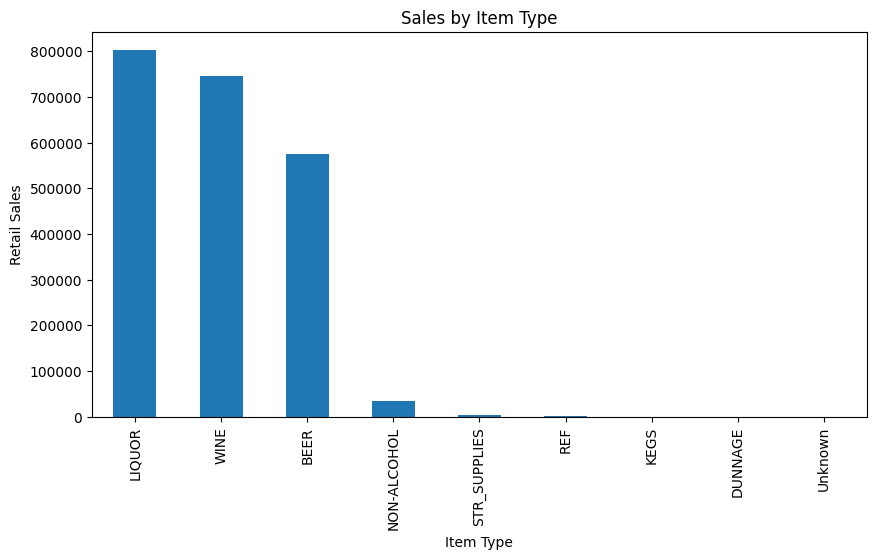

In [10]:
# checking which item types sell the most
type_sales = df.groupby("ITEM TYPE")["RETAIL SALES"].sum().sort_values(ascending=False)

# plotting the sales by item type
plt.figure(figsize=(10,5))
type_sales.plot(kind="bar")
plt.title("Sales by Item Type")
plt.xlabel("Item Type")
plt.ylabel("Retail Sales")
plt.show()

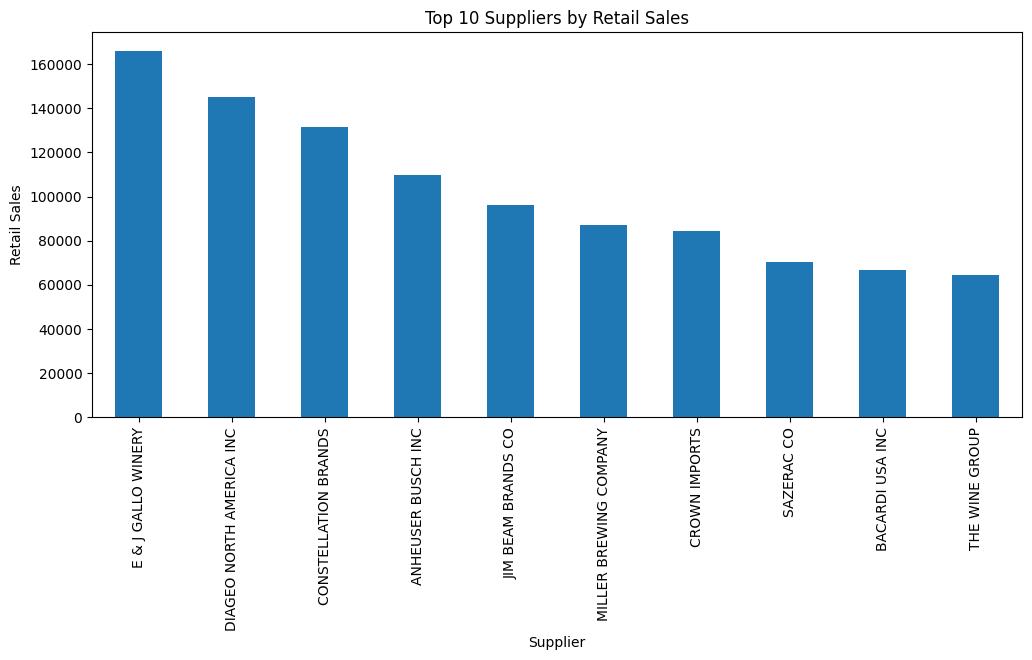

In [11]:
supplier_sales = df.groupby("SUPPLIER")["RETAIL SALES"].sum()

# sorting suppliers from highest to lowest and taking top 10
top_suppliers = supplier_sales.sort_values(ascending=False).head(10)

# plotting the top 10 suppliers
plt.figure(figsize=(12,5))
top_suppliers.plot(kind="bar")
plt.title("Top 10 Suppliers by Retail Sales")
plt.xlabel("Supplier")
plt.ylabel("Retail Sales")
plt.show()


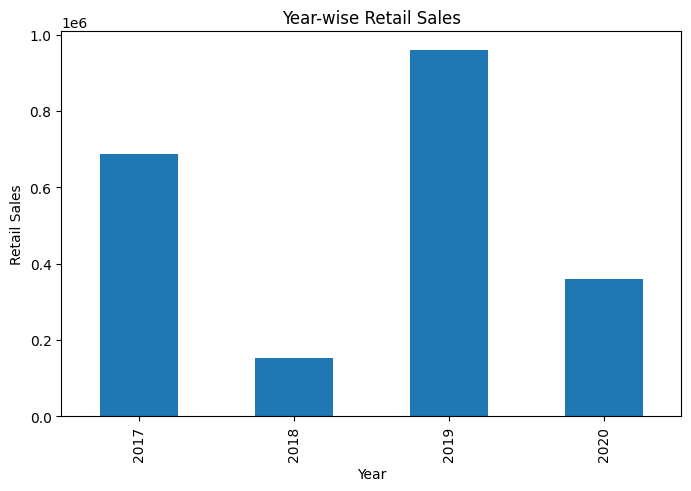

In [12]:
# checking total retail sales for each year
yearly_sales = df.groupby("YEAR")["RETAIL SALES"].sum()

# plotting sales by year
plt.figure(figsize=(8,5))
yearly_sales.plot(kind="bar")
plt.title("Year-wise Retail Sales")
plt.xlabel("Year")
plt.ylabel("Retail Sales")
plt.show()

In [13]:
df["RETAIL SALES"].mean()

np.float64(7.024284841294349)

In [14]:
df["RETAIL SALES"].median()

np.float64(0.32)

In [15]:
df["RETAIL SALES"].mode()

0    0.0
Name: RETAIL SALES, dtype: float64

In [16]:
df["RETAIL SALES"].std()

np.float64(30.986030642992162)

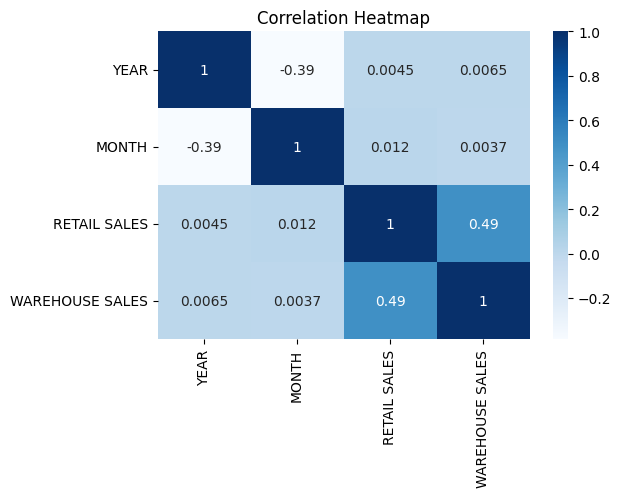

In [17]:
# selecting numerical columns for correlation
num_cols = ["YEAR", "MONTH", "RETAIL SALES", "WAREHOUSE SALES"]

# calculating correlation
corr = df[num_cols].corr()

# plotting heatmap
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

1. Monthly Sales Trend

The retail sales data shows no major pattern of increasing or decreasing sales between different months. The sales data shows irregular patterns between months because demand seems to follow seasonal and product-related patterns instead of a consistent trend.

2. Item Type Sales

The sales data shows that Liquor and Wine and Beer products generate the highest revenue for the company. The sales data shows Liquor leads all other products in sales followed by Wine as the second highest seller. The sales data indicates that the business generates most of its revenue from alcoholic products because Non-Alcohol and other categories have minimal sales.

3. Top 10 Suppliers

The sales data shows that few suppliers produce the majority of business revenue. The main suppliers generate sales that surpass all other suppliers by a substantial amount which shows the company relies almost entirely on its core suppliers for revenue.

4. Yearly Sales Trend

The sales information in the dataset shows no clear pattern of annual growth or decline. The business maintained steady sales throughout the available years because it showed no major annual growth or decline.

5. Correlation Heatmap

The Retail Sales and Warehouse Sales data shows a 0.49 correlation which represents a moderate positive connection between these variables. The data shows that warehouse sales growth leads to increased retail sales. The sales data shows no significant relationship between time-based variables because Year and Month correlations remain weak.
